<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad9/Actividad9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esquivel Ovilla José Aarón

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint, solve_ivp


**Ejercicio 1.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}

\begin{equation*}
 A
 =
  \begin{bmatrix}
   0 & 1 \\
   -1 & 0
   \end{bmatrix}
\end{equation*}

In [2]:
#Tenemos la matriz [[0,1],[-1,0]]
#Obtenemos los eigenvalores de la matriz A
A = np.array([[0,1],[-1,0]])
print(A)
eigvalsA, eigvecsA= la.eig(A)
print("Eigenvalores:", eigvalsA)
#obtenemos la traza de la matriz 
tr = np.trace(A)
print("La traza de la matriz es:",tr)

[[ 0  1]
 [-1  0]]
Eigenvalores: [0.+1.j 0.-1.j]
La traza de la matriz es: 0


Tenemos que nuestro punto crítico es el centro (0,0)

Centro: $a=0, b>0 \ $  ($\mathrm{Tr}(A) = 0$)

Las raíces son de la forma 

\begin{equation*}
\lambda_{} = a \pm i b
\end{equation*}


In [3]:
#Resolvemos el sistema homogéneo 
B = np.zeros((2,1))
sh = la.solve(A,B)
print("la solución es:x = ", sh[0], "y = ",sh[1])

la solución es:x =  [-0.] y =  [0.]


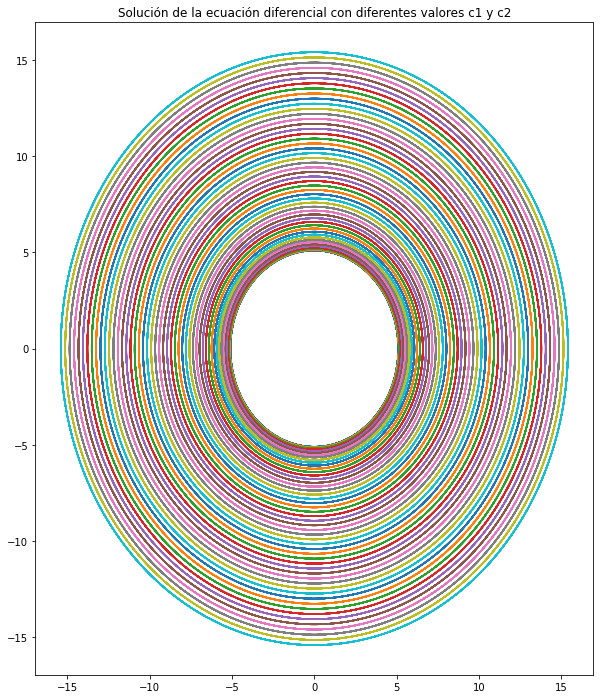

In [4]:
#graficamos las soluciones 
#c1 y c2 son las constantes 

def xy(t,c1,c2):
      s = [c1*np.cos(t)+c2*np.sin(t),-c1*np.sin(t)+c2*np.cos(t)]
      return s 

t = np.linspace(0,50,1000)
c1 = list(np.linspace(5,2,100))
c2 = list(np.linspace(1,15,50))

plt.figure(figsize=(10,12))
for c,d in zip(c1,c2):
  v=xy(t,c,d)
  sol=np.array(v)
  plt.plot(sol[0,:],sol[1,:])
  plt.title(('Solución de la ecuación diferencial con diferentes valores c1 y c2'))


**Ejercicio 2.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = &  x  \\
\end{eqnarray*}


\begin{equation*}
 A
 =
  \begin{bmatrix}
   0 & 1 \\
   1 & 0
   \end{bmatrix}
\end{equation*}

In [5]:
#Tenemos la matriz [[0,1],[-1,0]]
#Obtenemos los eigenvalores de la matriz A
A = np.array([[0,1],[1,0]])
print(A)
eigvalsA, eigvecsA= la.eig(A)
print("Eigenvalores:", eigvalsA)

v1 = eigvecsA[:,0]
v2 = eigvecsA[:,1]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)

#obtenemos la traza de la matriz 
tr = np.trace(A)
print("La traza de la matriz es:",tr)

[[0 1]
 [1 0]]
Eigenvalores: [ 1.+0.j -1.+0.j]
Eigenvectores:
v1= [0.70710678 0.70710678]
v2= [-0.70710678  0.70710678]
La traza de la matriz es: 0


La solución se puede escribir como 

\begin{equation*}
x(t) = c_1 \exp(\lambda t) \ {v_1} + c_2 \exp(\mu t) \ {v_2}
\end{equation*}

donde ${v_1}$ y ${v_2}$ son los eigenvectores correspondentes a los eigenvalores $\lambda$ y $\mu$ respectivamente, $c_1$ y $c_2$ constantes.

Clasificamos al punto crítico como: Punto silla 

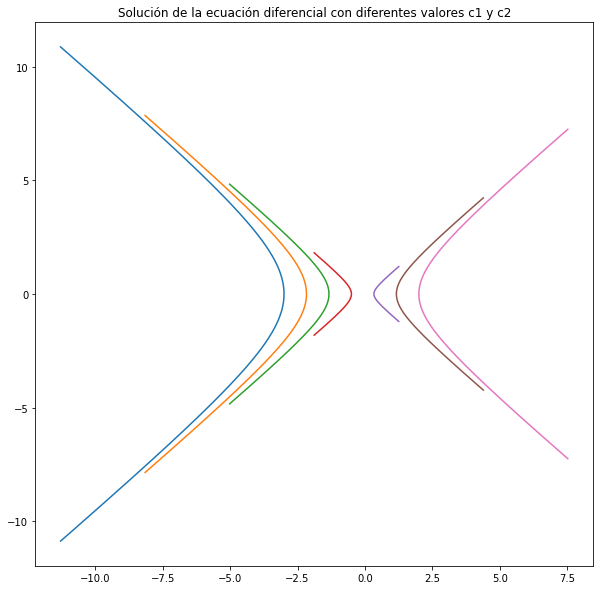

In [6]:

def x(t,c1,c2):
      s =  [c1*np.exp(t)-c2*np.exp(-t),c1*np.exp(t)+c2*np.exp(-t)]
      return s 

t = np.linspace(-2,2,500)
c1=list(np.linspace(-1.5,1,7))
c2=list(np.linspace(1.5,-1,7))

plt.figure(figsize=(10,10))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  sol=np.array(v)
  plt.plot(sol[0,:],sol[1,:])
  plt.title(('Solución de la ecuación diferencial con diferentes valores c1 y c2'))

**Ejercicio 3.** 

\begin{eqnarray*}
\frac{d^2 x}{d t^2} + \omega_0^2 x & = & 0, \ \omega_0 > 0  \\
\end{eqnarray*}

Hacemos 

$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = -\omega_0^2 x  \\
\end{eqnarray*}$$

Los eigenvalores son de la  forma 
\begin{equation*}
\lambda =  \pm w_0i
\end{equation*}

Por lo que las soluciones van a ser senos y cosenos 

Clasificamos al punto como: Centro

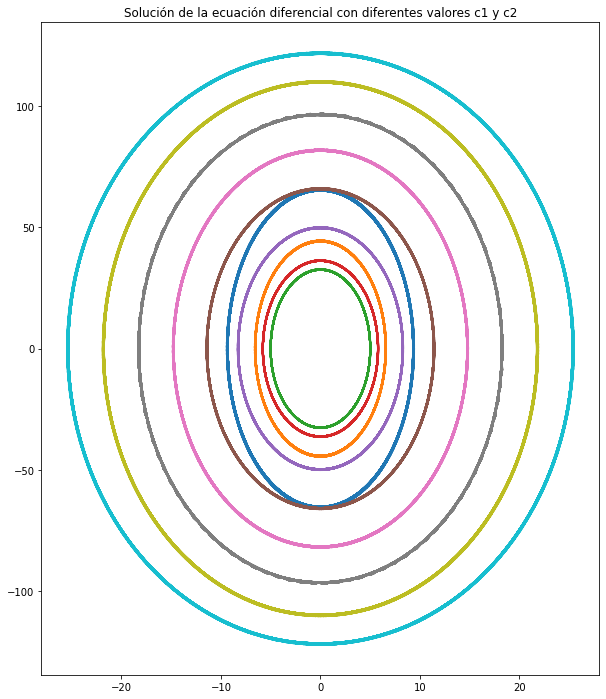

In [7]:
#las soluciones 
w_0 = 5
def xy(t,c1,c2,w_0):
 sol = [c1*np.cos(w_0*t)+c2*np.sin(w_0*t),-c1*w_0*np.sin(w_0*t)+c2*w_0*np.cos(w_0*t)]
 return np.array(sol)

t = np.linspace(0,50,1000)
c1 = list(np.linspace(-8,25,10))
c2 = list(np.linspace(7,-5,50))

plt.figure(figsize=(10,12))
for a,b in zip(c1,c2):

  p=xy(t,w_0,a,b)
  s=np.array(p)
  plt.plot(s[0,:],s[1,:])
  plt.title(('Solución de la ecuación diferencial con diferentes valores c1 y c2'))

**Ejercicio 4.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}

De estas tres ecuaciones podemos ver que 
\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\end{eqnarray*}
Es independiente a las otras dos 

In [8]:
#Resolvemos los dos sistemas de ecuaciones 
#Sistema de las ecuaciones dependientes 
S_3 = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
#Sistema 
SI = np.array([[0,-2],[2,0]])
#obtenemos sus eigenvalores correspondientes 
eigvalsA, eigvecsA= la.eig(S_3)
print("Eigenvalores de S_3:", eigvalsA)
eigvalsA, eigvecsA= la.eig(SI)
print("Eigenvalores de SI:", eigvalsA)
tr = np.trace(S_3)
trI = np.trace(SI)
print("La traza de la matriz es:",tr)
print("La traza de la matriz es:",trI)

Eigenvalores de S_3: [ 0.+2.j  0.-2.j -2.+0.j]
Eigenvalores de SI: [0.+2.j 0.-2.j]
La traza de la matriz es: -2
La traza de la matriz es: 0


In [9]:
#Ahora resolvemos el sistema para encontrar sus puntso críticos 
S = np.zeros((3,1))
pc = la.solve(S_3,S)
print("Los puntos críticos son:", pc)

Los puntos críticos son: [[-0.]
 [-0.]
 [ 0.]]


La solución se puede escribir como 

\begin{equation*}
x(t) = c_1 \exp(-2t) ,c_2 cos(2 t) + c_3 sen(2t), -c_2sen(2t) + c_3cos(2t)
\end{equation*}

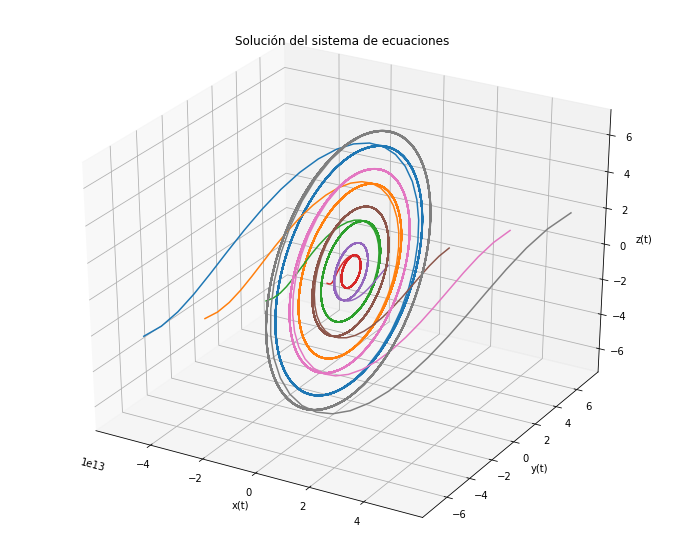

In [10]:
#Defininos la función 
def f(t,c1,c2,c3):
  s=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return s

t = np.linspace( -15, 80, 1000 )
#Constantes 
c1 = np.linspace( -5,5,8 )
c2 = np.linspace(2,-1,8 )
c3 = np.linspace(-6,7,8)

plt.figure(figsize = ( 12, 10 ))
ax = plt.axes( projection= "3d" )

for a,b,c in zip(c1,c2,c3):
  v = f(t,a,b,c)
  s = np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])

plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()

# **Ejercicio 5.**



$$\begin{eqnarray*}
\frac{d x}{d t} = - x + z  \\
\frac{d y}{dt } =  3 y  \\
\frac{d z}{dt } =  - x - z \\
\end{eqnarray*}$$

Podemos ver que 

$$\begin{eqnarray*}
\frac{d y}{dt } =  3 y  \\
\end{eqnarray*}$$

Es independiente a las otras dos 

In [11]:
#Hacemos el arreglo 
A = np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
B = np.array([[-1,1],[-1,-1]])
eigvalsA, eigvecsA= la.eig(B)
print("Los eigenvalores de B son:",eigvalsA )
trA = np.trace(A)
trB = np.trace(B)
print("La traza de la matriz A es:",trA)
print("La traza de la matriz B es:",trB)


Los eigenvalores de A son: [-1.+1.j -1.-1.j  3.+0.j]
Los eigenvalores de B son: [-1.+1.j -1.-1.j]
La traza de la matriz A es: 1
La traza de la matriz B es: -2


In [12]:
#Puntos críticos 
C=np.zeros((3,1))
pc=la.solve(A,C)
print("Los puntos críticos son:",pc)

Los puntos críticos son: [[-0.]
 [ 0.]
 [-0.]]


Como podemos notar, tenemos soluciones complejas con una traza de -2, por lo que las soluciones van a tener la forma de:
\begin{equation*}
x(t) = \exp(-t) (c_1\cos{t}+c_3\sin{t}),c_2\exp(3t) , \exp(-t)(c_3\cos{t}-c_1\sin{t})
\end{equation*}

Y decimos que es Foco o espiral estable

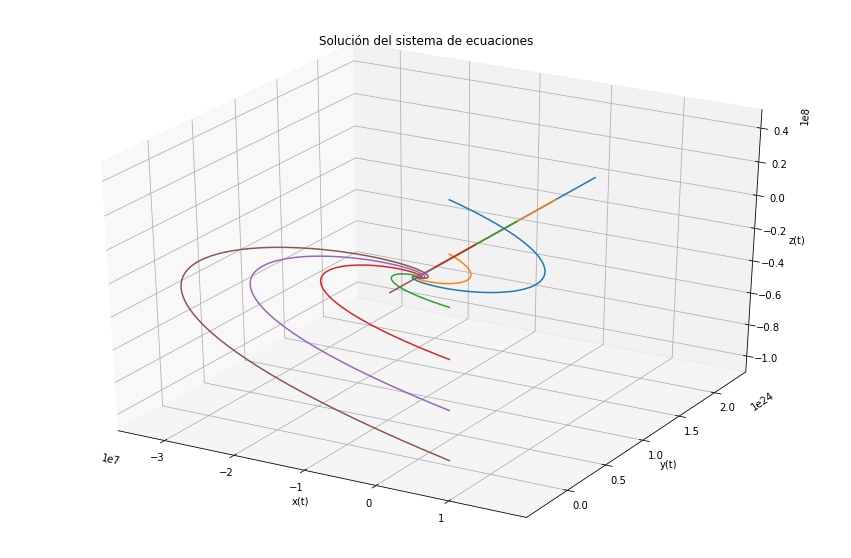

In [13]:
#Función
def f(t,c1,c2,c3):
  sol = [np.exp(-t)*(c1*np.cos(t)+c3*np.sin(t)),c2*np.exp(3*t) ,np.exp(-t)*(c3*np.cos(t)-c1*np.sin(t)) ]
  return sol

t=np.linspace(-16,18,1000)
#Constantes
c1=list(np.linspace(-2,3,6))
c2=list(np.linspace(8,-3,7))
c3=list(np.linspace(-5,15,7))

plt.figure(figsize = ( 15, 10 ))
ax = plt.axes( projection= "3d" )
for a,b,c in zip(c1,c2,c3):
  p = f(t,a,b,c)
  s = np.array(p)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
 
plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()

**Ejercicio 6:**

\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}

Podemos ver el sistema como una matriz que sería: 

\begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}
Que lo podemos ver como el siguiente sistema:
$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} -x \\ x+2y \end{pmatrix} $$
En donde lo que obtendremos será:
\begin{pmatrix} -x \\ x+2y \end{pmatrix}




In [14]:
#Hacemos el arreglo 
A = np.array([[-1,0],[1,2]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
trA = np.trace(A)
print("La traza de la matriz A es:",trA)

Los eigenvalores de A son: [ 2.+0.j -1.+0.j]
La traza de la matriz A es: 1


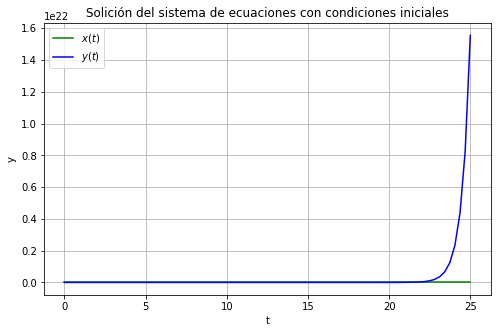

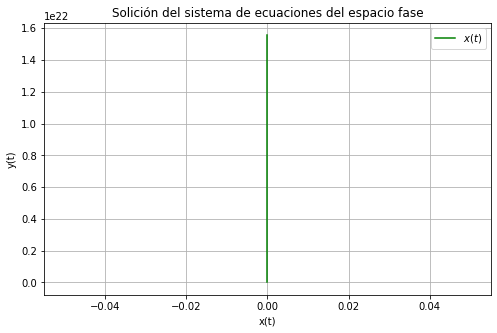

In [15]:
#Definimos a nuestra función 
def f(y, t):
  x, p = y
  return [-x, x+2*p]

#Condiciones iniciales 
y_0=[0,3] 
t=np.linspace(0,25,80)

# Graficamos las soluciones
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'green',label='$x(t)$')
plt.plot(t,y[0:,1],'blue',label='$y(t)$')
plt.title('Solición del sistema de ecuaciones con condiciones iniciales')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase 
plt.figure(figsize=(8,5))
plt.plot(y[0:,0],y[:,1],'green',label='$x(t)$')
plt.legend(loc= "best")
plt.title('Solición del sistema de ecuaciones del espacio fase')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


**Ejercicio 7:**

\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}

Como en el caso anterior podemos escribrir la ecuación como sigue:

$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 2x+y \\ x+y \end{pmatrix} $$
Donde la solución es: 
\begin{pmatrix} 2x+y \\ x+y \end{pmatrix}

In [16]:
#Hacemos el arreglo 
A = np.array([[2,1],[1,1]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
trA = np.trace(A)
print("La traza de la matriz A es:",trA)

Los eigenvalores de A son: [2.61803399+0.j 0.38196601+0.j]
La traza de la matriz A es: 3


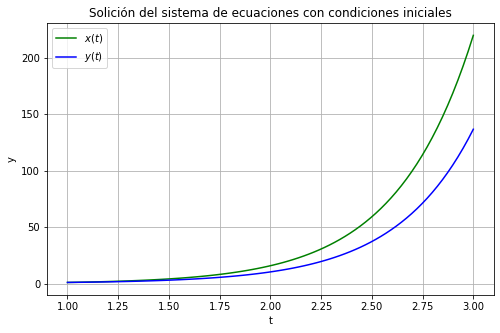

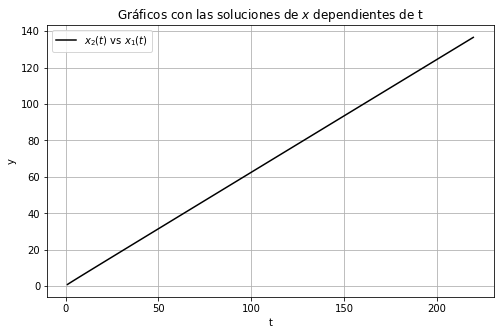

In [17]:
#Definimos la función 
def f(y, t):
  x, p = y
  return [2*x+p, x+p]
#Condiciones iniciales
y_0=[1,1] 
t=np.linspace(1,3,80)
# Graficamos las soluciones
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'green',label='$x(t)$')
plt.plot(t,y[0:,1],'blue',label='$y(t)$')
plt.title('Solición del sistema de ecuaciones con condiciones iniciales')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


#Espacio fase
#Espacio fase
plt.figure(figsize=(8,5))
plt.plot(y[0:,0],y[0:,1],'k',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Gráficos con las soluciones de $x$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


**Ejercicio 8:**

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,3) \\
A & = & \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}

Esto lo podemos ver como:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = A x $$

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix}$$

Entonces:
$$\begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix} 3x_2 \\ x_1-2x_2 \end{pmatrix} $$

El punto crítico es entonces un punto silla 


In [18]:
#Hacemos el arreglo 
A = np.array([[0,3],[1,-2]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
trA = np.trace(A)
print("La traza de la matriz A es:",trA)

Los eigenvalores de A son: [ 1.+0.j -3.+0.j]
La traza de la matriz A es: -2


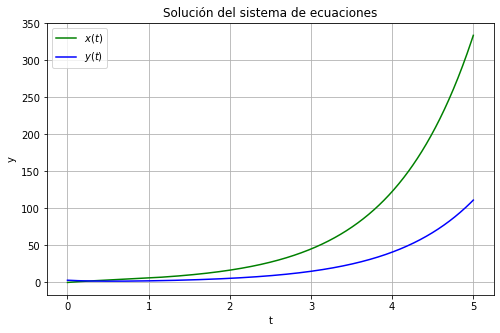

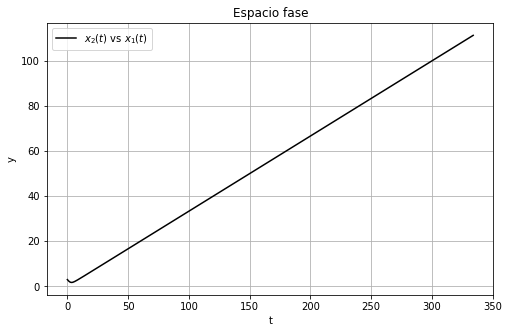

In [19]:
#Definimos la función 
def f(y, t):
  x_1, x_2 = y
  return [ 3*x_2,x_1-2*x_2]

#Condiciones iniciales
y_0=[0,3]
t=np.linspace(0,5,900)
#Grafica de las soluciones
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'green',label='$x(t)$')
plt.plot(t,y[0:,1],'blue',label='$y(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(y[0:,0],y[0:,1],'k',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Espacio fase')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**Ejercicio 9:**

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,-b,b) \\
A & = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}

Como 
\begin{eqnarray*}
\frac{d x}{d t} & = & A x 
\end{eqnarray*}
Entonces 
$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}$$
Al final tenemos 
$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 2x_1 \\ -x_2 \\ 2x_2-3x_3 \end{pmatrix} $$
Y la solución entonces es 
\begin{pmatrix} 2x_1 \\ -x_2 \\ 2x_2-3x_3 \end{pmatrix}

In [20]:
#Hacemos el arreglo 
A = np.array([[2,0,0],[0,-1,0],[0,2,-3]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
trA = np.trace(A)
print("La traza de la matriz A es:",trA)

Los eigenvalores de A son: [ 2.+0.j -3.+0.j -1.+0.j]
La traza de la matriz A es: -2


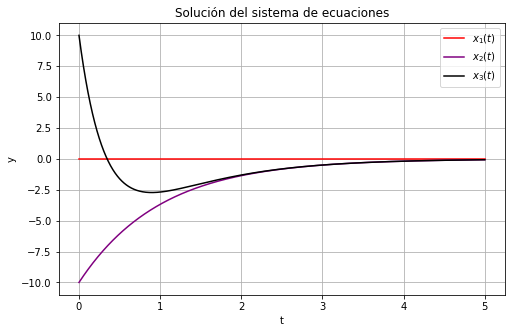

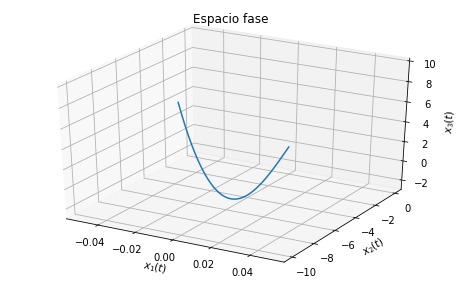

In [21]:
#Definimos la función 
def f(y, t):
  x_1, x_2, x_3 = y
  return [ 2*x_1 , -x_2 , 2*x_2-3*x_3 ]
#Condiciones iniciales
#Le damos un valor a b 
b = 10
y_0 = [0,-b,b]
t=np.linspace(0,5,900)

plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'red',label='$x_1(t)$')
plt.plot(t,y[0:,1],'purple',label='$x_2(t)$')
plt.plot(t,y[0:,2],'black',label='$x_3(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase
plt.figure(figsize=(8,5))
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Espacio fase')
ax.set_xlabel('$x_1(t)$')
ax.set_ylabel('$x_2(t)$')
ax.set_zlabel('$x_3(t)$')
plt.grid()
plt.show()

**Ejercicio 10:** 

Se tiene el siguiente sistema de resortes acoplados con dos masas.  

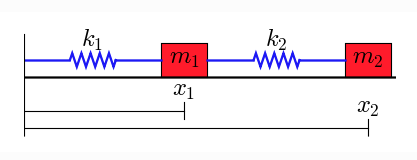


El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}

Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.  

**10.1)** Encuentre los eigenvalores del sistema y diga como son las soluciones.  

**10.2)** Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$ 

**10.3)** Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

Aplicando las condiciones que nos dicen tenemos 
\begin{eqnarray*}
x_1^{''} + b_1 x_1^{'}+k_1 (x_1-1)-k_2(x_2-x_1-1) & = & 0 \\
x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-1) & = & 0 \\
\end{eqnarray*}

Tomando como un cambio de variable a:
$$ x_3=\frac{dx_1}{dt};\; x_4=\frac{dx_2}{dt} $$

entonces tendremos:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1\\ -(k_1+k_2) & k_2 & -b_1 & 0 \\ k_2 & -k_2 & 0 & b_2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ k_1-k_2 \\ k_2 \end{pmatrix}= P\vec{x}+\vec{u} $$

Entonces tendremos que :
$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} x_3 \\ x_4 \\ -(k_1+k_2)x_1+k_2x_2-b_1x_3+(k_1-k_2) \\ k_2x_1-k_2x_2-b_2x_4+k_2 \end{pmatrix}  $$

Como 10.1 no tenemos valores de las k y b, juntaremos el 10.1 y 10.2, ya que en el 10.2 si se nos proporcionan los valores necesarios para poder hacer los calculos

**10.2)** Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$ 

In [22]:
#Primero definimos la función que vamos a necesitar
#b1 = b2 = 0 
#k1 = 6
#k2 = 4
def r(y,t,k1,k2,b1,b2):
  x1, x2, x3, x4 = y
  dxdt=[x3, x4, -(k1+k2)*x1+k2*x2-b1*x3+k1-k2, k2*x1-k2*x2-b2*x4+k2]
  return dxdt
b1 = b2 = 0
k1 = 6
k2 = 4
#Condiciones iniciales
y_0=[1,4,0,0]

In [23]:
#Obtenemos los eigenvalores que se piden en el 10.1
#Definimos el arreglo
A=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(A)
print("Los eigenvalores son:",eigenval)

Los eigenvalores son: [-7.84812828e-18+3.46410162j -7.84812828e-18-3.46410162j
  3.56037039e-17+1.41421356j  3.56037039e-17-1.41421356j]


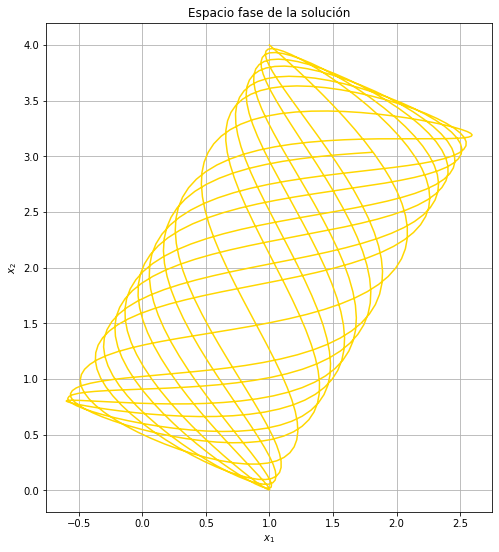

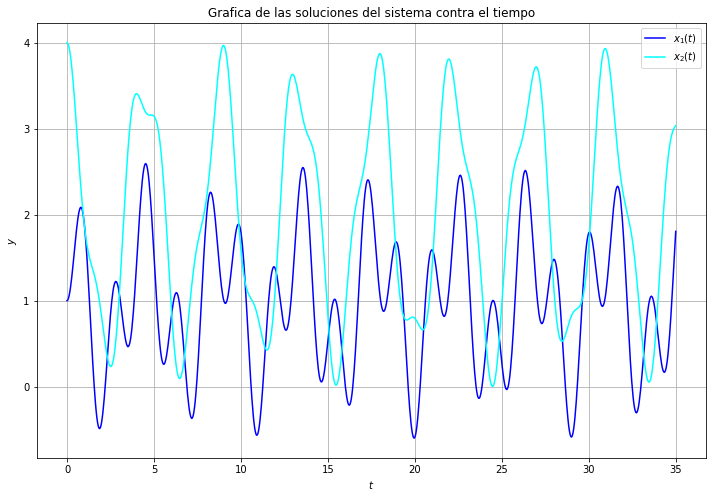

In [24]:
#Los primeros eigenvalores se podrían considerar como cero, pero en este caso no lo consideraremos como cero 
t=np.linspace(0,35,900)
y=odeint(r,y_0,t,args=(k1, k2, b1, b2))
#Gáfica del espacio fase 
plt.figure(figsize=(8,9))
plt.plot(y[0:,0],y[0:,1],color='gold')
plt.title('Espacio fase de la solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

#Gráfica del sistema pero ahora contra el tiempo 
plt.figure(figsize=(12,8))
plt.plot(t,y[0:,0],color='blue',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='cyan',label='$x_2(t)$')
plt.title('Grafica de las soluciones del sistema contra el tiempo')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

**10.3)** Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

In [25]:
#Definimos la misma función anterior 
def r(y,t,k1,k2,b1,b2):
  x1, x2, x3, x4 = y
  dxdt=[x3, x4, -(k1+k2)*x1+k2*x2-b1*x3+k1-k2, k2*x1-k2*x2-b2*x4+k2]
  return dxdt
b1 = 0.1
b2 = 0.2
k1 = 6
k2 = 4
#Condiciones iniciales
y_0=[1,4,0,0]


In [26]:
#Obtenemos los eigenvalores que se piden en el 10.1
#Definimos el arreglo
A=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(A)
print("Los eigenvalores son:",eigenval)

Los eigenvalores son: [-0.02012662+3.46155525j -0.02012662-3.46155525j  0.07012662+1.41349145j
  0.07012662-1.41349145j]


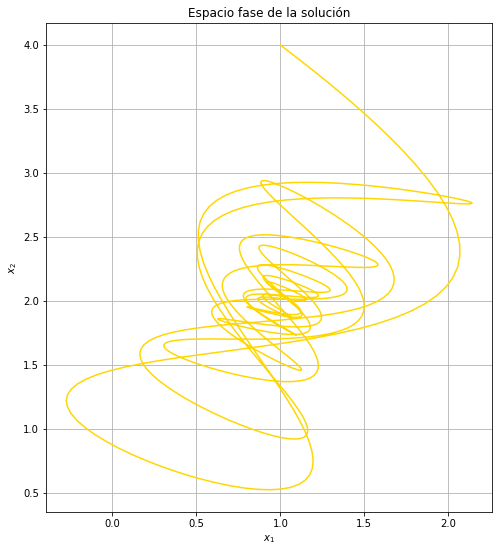

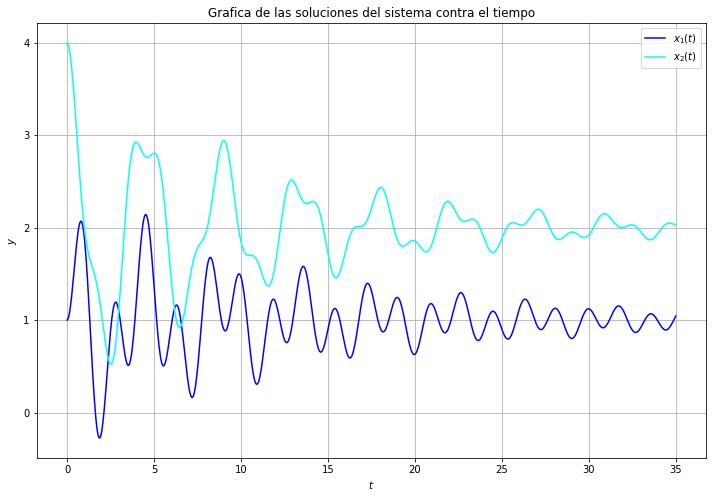

In [27]:
#Los primeros eigenvalores se podrían considerar como cero, pero en este caso no lo consideraremos como cero 
t=np.linspace(0,35,900)
y=odeint(r,y_0,t,args=(k1, k2, b1, b2))
#Gáfica del espacio fase 
plt.figure(figsize=(8,9))
plt.plot(y[0:,0],y[0:,1],color='gold')
plt.title('Espacio fase de la solución')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

#Gráfica del sistema pero ahora contra el tiempo 
plt.figure(figsize=(12,8))
plt.plot(t,y[0:,0],color='blue',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='cyan',label='$x_2(t)$')
plt.title('Grafica de las soluciones del sistema contra el tiempo')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()